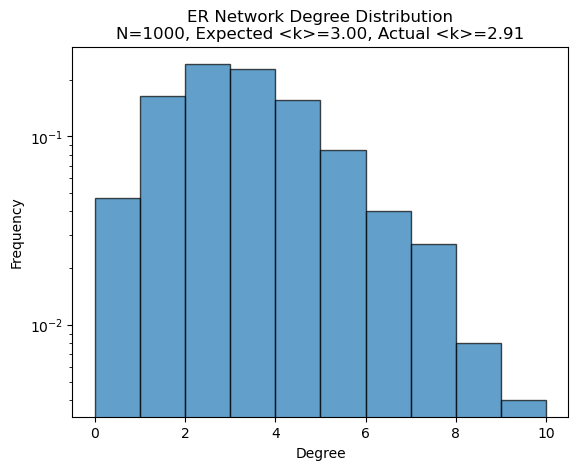

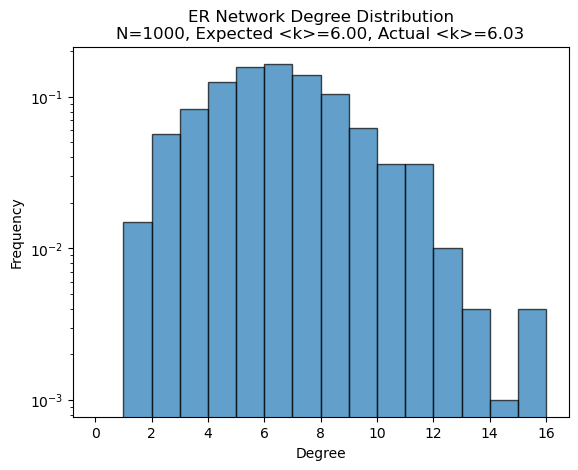

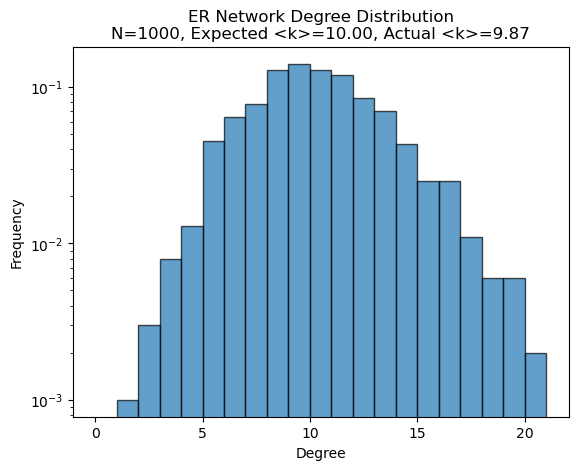

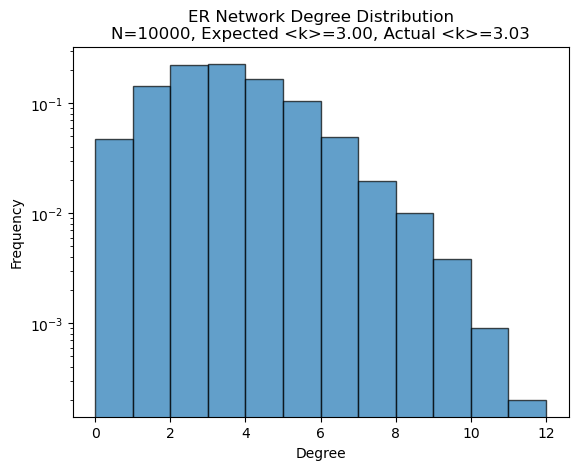

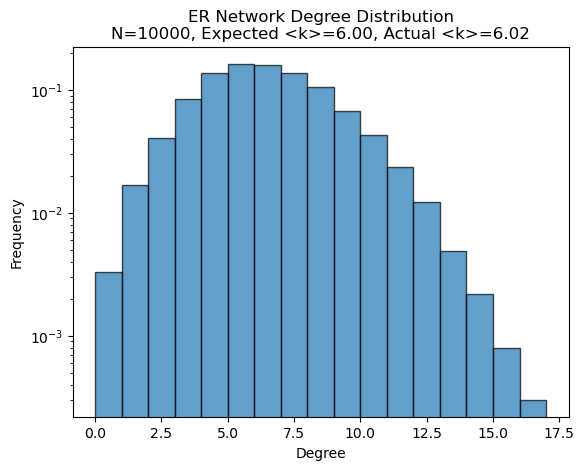

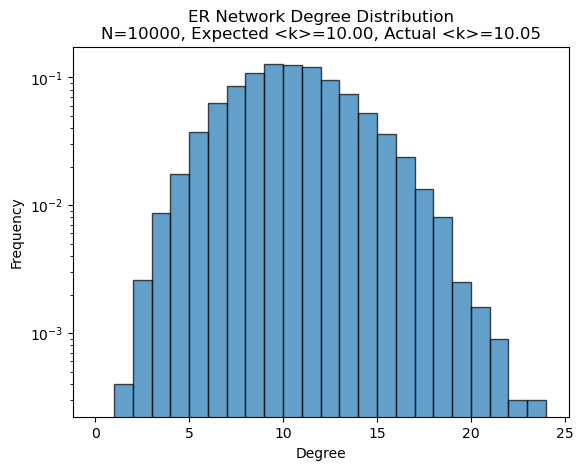

<Figure size 640x480 with 0 Axes>

In [23]:
# 1. Erdös-Rényi (ER) G(N, p) Model

# import libraries
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy


# generate ER network G(N, p)
def generate_er_network_gnp(N, p):
    """
    Generates an Erdös-Rényi network G(N, p).
    
    Parameters:
        N (int): Number of nodes.
        p (float): Probability of adding an edge between two distinct nodes.
    
    Returns:
        List[Tuple[int, int]]: List of edges in the network.
    """
    edges = [(i, j) for i in range(N) for j in range(i + 1, N) if random.random() < p]
    return edges

# plot degree distribution of ER network
def plot_degree_distribution(edges, N, expected_k):
    """
    Plots the degree distribution of a network and annotates the actual average degree.
    
    Parameters:
        edges (List[Tuple[int, int]]): List of edges in the network.
        N (int): Number of nodes.
        expected_k (float): Expected average degree <k>.
    """
    degrees = np.zeros(N)
    for edge in edges:
        degrees[edge[0]] += 1
        degrees[edge[1]] += 1
    
    actual_k = np.mean(degrees)
    
    plt.hist(degrees, bins=range(int(max(degrees)) + 1), density=True, edgecolor='black', alpha=0.7)
    plt.title(f'ER Network Degree Distribution\nN={N}, Expected <k>={expected_k:.2f}, Actual <k>={actual_k:.2f}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.yscale('log', nonpositive='clip')  # Use log scale for better visibility
    plt.show()


Ns = [1000, 10000]  # Network sizes
k_values = [3, 6, 10]  # Desired average degrees

# Generate ER networks and plot degree distributions
for N in Ns:
    for k in k_values:
        p = k / (N - 1)  # Calculate probability for desired <k>
        edges = generate_er_network_gnp(N, p)
        plot_degree_distribution(edges, N, k)  # Pass expected <k> for annotation
        
# Save each plot as a PNG file (and all other plots)
plt.savefig('ER_network_degree_distribution.png')   
    
            

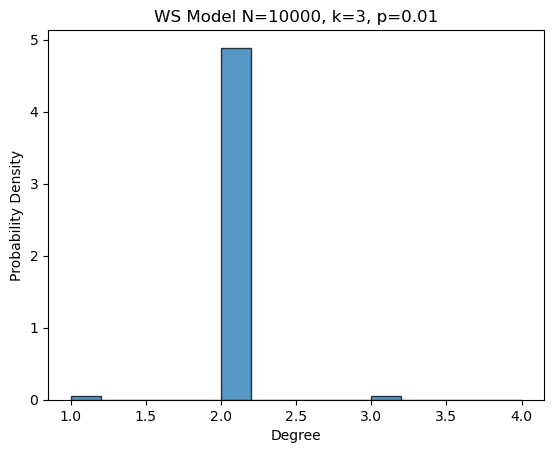

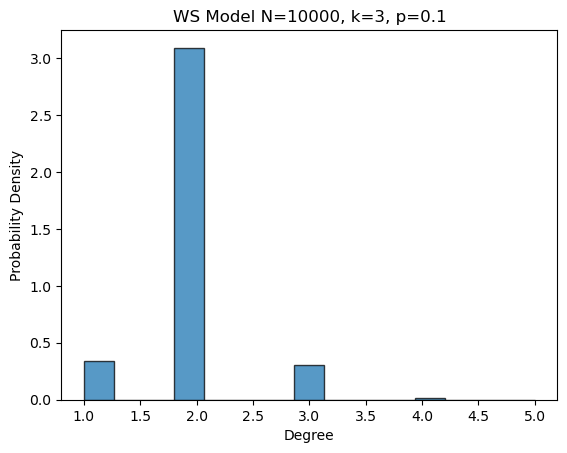

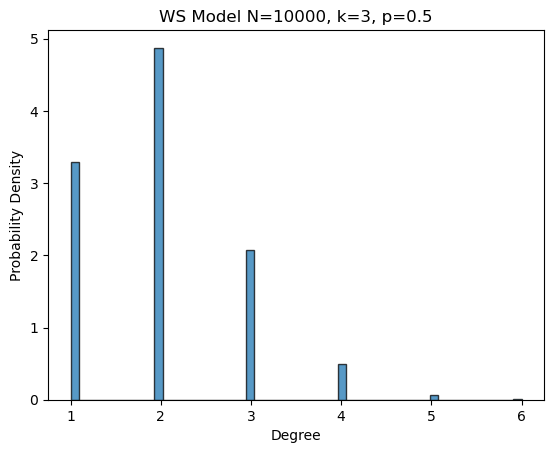

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

def generate_ws_network(N, k, p):
    """Generates a Watts-Strogatz small-world network."""
    G = nx.Graph()
    for i in range(N):
        for j in range(1, k // 2 + 1):
            G.add_edge(i, (i + j) % N)
            G.add_edge(i, (i - j + N) % N)
    for edge in list(G.edges()):
        if random.random() < p:
            u, v = edge
            G.remove_edge(u, v)
            w = random.choice(list(set(range(N)) - {u} - set(G.neighbors(u))))
            G.add_edge(u, w)
    return G

def plot_degree_distribution(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins='auto', density=True, alpha=0.75, edgecolor='black')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.show()

# Usage for N=10000
N = 10000
k = 3  # Initial degree
p_values = [0.01, 0.1, 0.5]  

for p in p_values:
    G = generate_ws_network(N, k, p)
    plot_degree_distribution(G, f"WS Model N={N}, k={k}, p={p}")


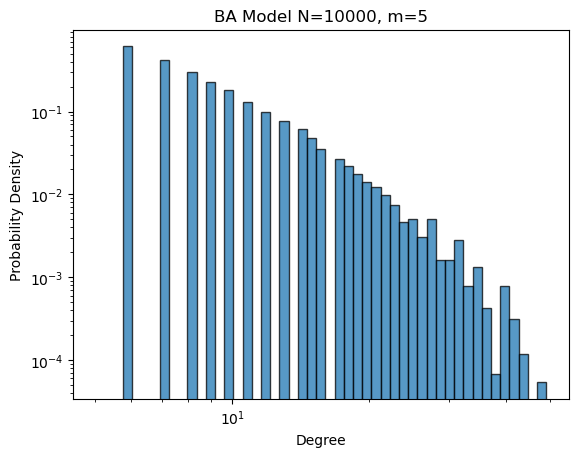

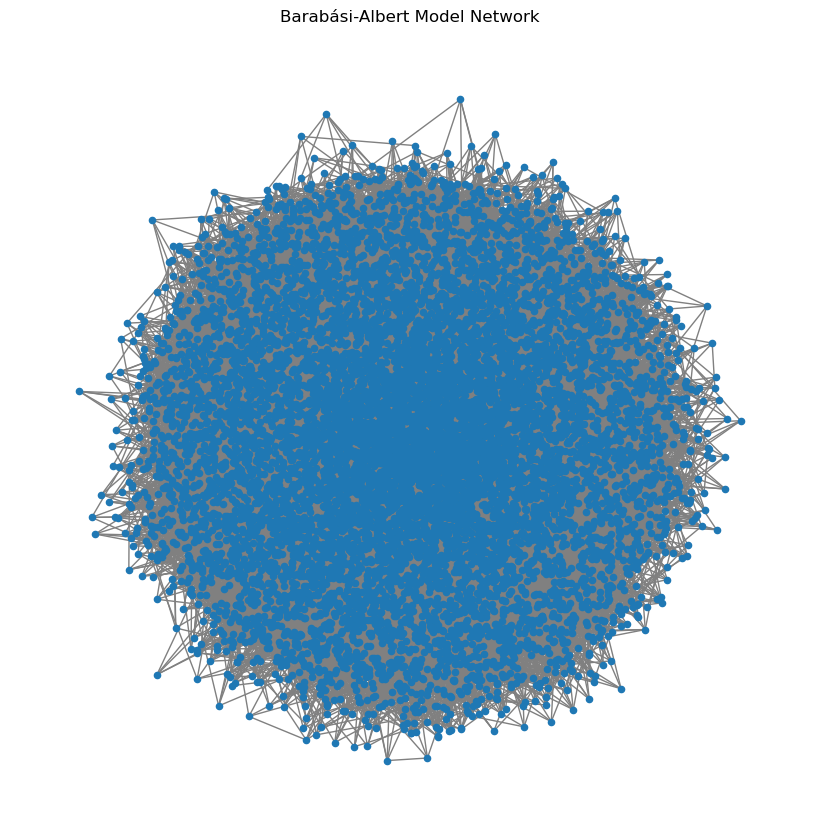

In [29]:
# 3. Barabási-Albert (BA) Model
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

def generate_ba_network(N, m):
    """Generates a Barabási-Albert network."""
    G = nx.Graph()
    G.add_nodes_from(range(m))
    for i in range(m, N):
        targets = set()
        while len(targets) < m:
            node = random.choice(tuple(G.nodes))
            if node not in targets:
                targets.add(node)
        G.add_node(i)
        for target in targets:
            G.add_edge(i, target)
    return G

def plot_degree_distribution(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 50), density=True, alpha=0.75, edgecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.show()

# Example usage for N=10000
N = 10000
m = 5  # Number of edges to attach from a new node to existing nodes

G_ba = generate_ba_network(N, m)
plot_degree_distribution(G_ba, f"BA Model N={N}, m={m}")
#VISUALIZE NETWORK
plt.figure(figsize=(8, 8))  # Set the figure size
pos = nx.spring_layout(G_ba)  # Compute node positions
nx.draw(G_ba, pos, node_size=20, edge_color='gray', with_labels=False)  # Draw the network
plt.title("Barabási-Albert Model Network")  # Set the title
plt.show()  # Show the plot



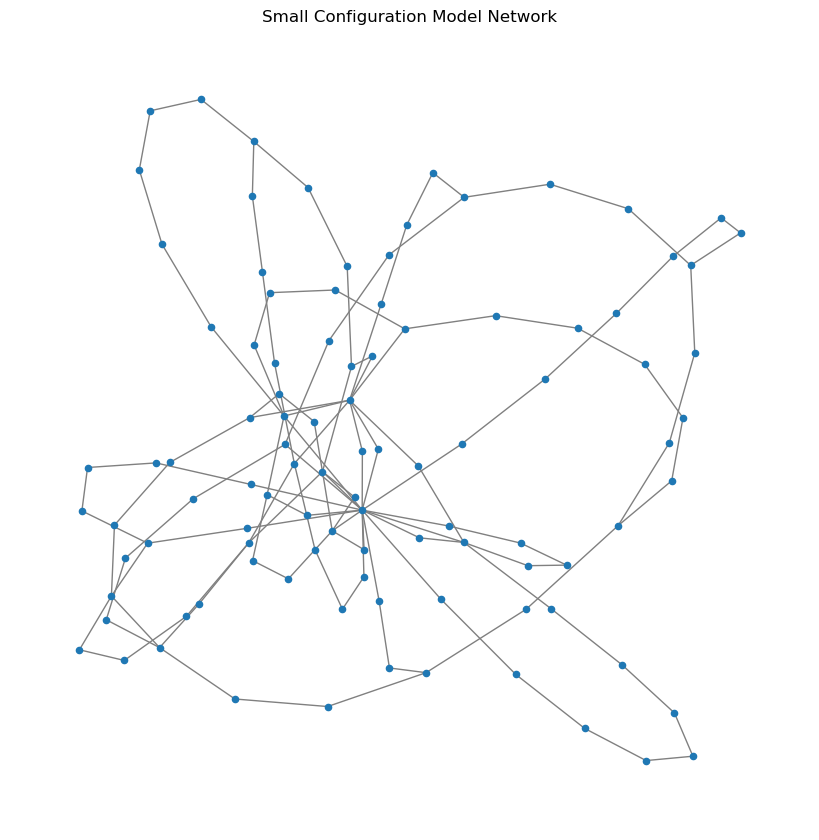

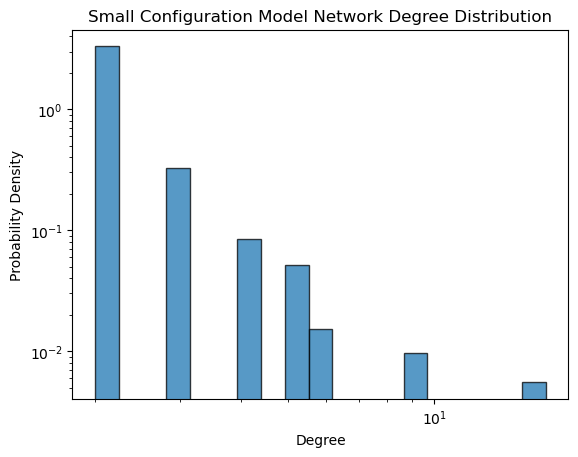

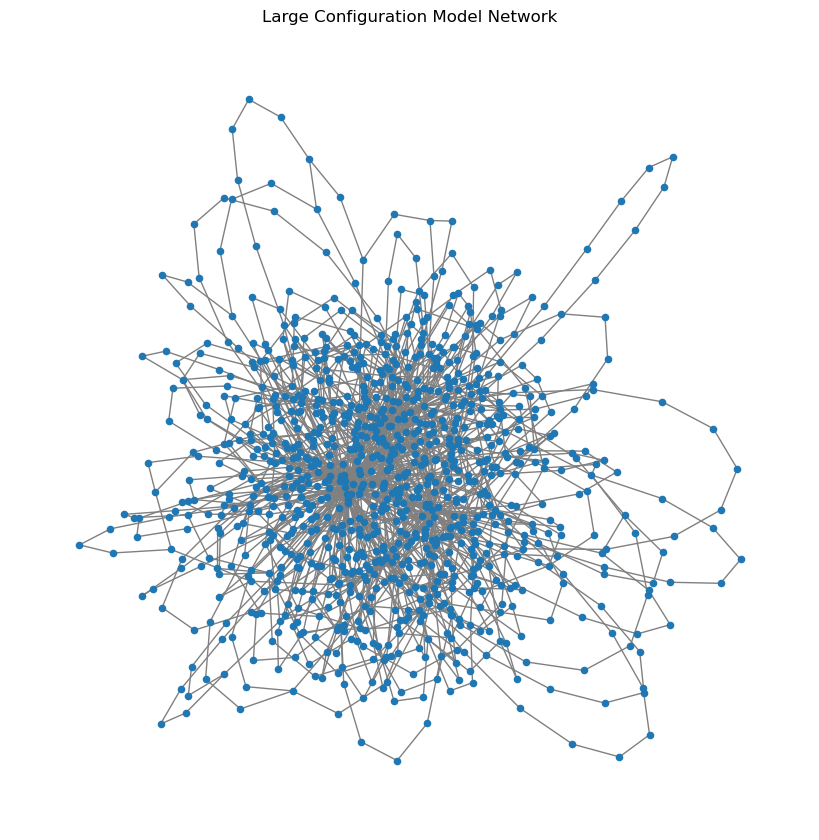

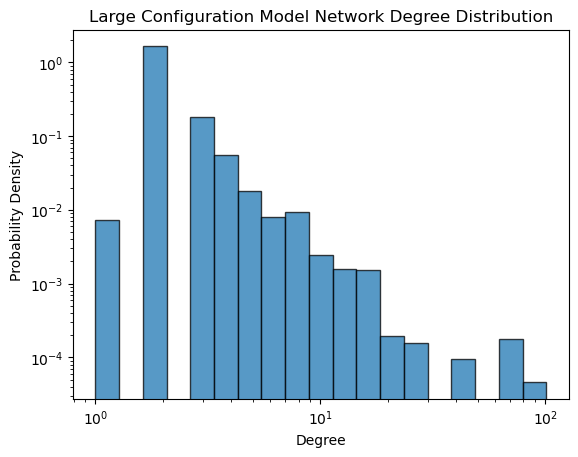

In [32]:
# 4. Configuration Model

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def generate_degree_sequence(N, exponent=3.0, min_degree=2, max_degree=None):
    """Generates a degree sequence following a power-law distribution."""
    if max_degree is None:
        max_degree = N // 2
    sequence = np.random.zipf(a=exponent, size=N) + (min_degree - 1)
    sequence = np.clip(sequence, min_degree, max_degree)
    if sum(sequence) % 2 != 0:
        sequence[np.argmax(sequence)] -= 1  # Ensure even sum of degrees
    return sequence

def configuration_model(degree_sequence):
    """Generates a network using the Configuration Model."""
    G = nx.configuration_model(degree_sequence)
    G = nx.Graph(G)  # Convert to simple graph, removing parallel edges/self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

def visualize_network(G, title):
    """Visualizes the network."""
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=20, edge_color='gray', with_labels=False)
    plt.title(title)
    plt.show()

def plot_degree_distribution(G, title):
    """Plots the degree distribution on a log-log scale."""
    degrees = [d for n, d in G.degree()]
    plt.hist(degrees, bins=np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 20), density=True, alpha=0.75, edgecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.show()

Usage
N_small, N_large = 100, 1000
exponent = 2.5

# Small Network
degree_sequence_small = generate_degree_sequence(N_small, exponent)
G_small = configuration_model(degree_sequence_small)
visualize_network(G_small, "Small Configuration Model Network")
plot_degree_distribution(G_small, "Small Configuration Model Network Degree Distribution")

# Large Network
degree_sequence_large = generate_degree_sequence(N_large, exponent)
G_large = configuration_model(degree_sequence_large)
visualize_network(G_large, "Large Configuration Model Network")
plot_degree_distribution(G_large, "Large Configuration Model Network Degree Distribution")
